In [29]:
%pylab inline
import numpy as np
import pandas as pd
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


# PGA dataset

In [30]:
res = pd.read_csv("result_forks.csv")
res

/home/waren/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,URL,SIVA_FILENAMES,FILE_COUNT,LANGS,LANGS_BYTE_COUNT,LANGS_LINES_COUNT,LANGS_FILES_COUNT,COMMITS_COUNT,BRANCHES_COUNT,FORK_COUNT,EMPTY_LINES_COUNT,CODE_LINES_COUNT,COMMENT_LINES_COUNT,LICENSE
0,https://github.com/powmedia/buildify,4a14cc02da0a9280538cd3f3242365601d72f241.siva,12,"JSON,JavaScript,Markdown,Text","653,18611,4669,1094","29,849,216,22","1,5,1,4",38,25,0,"0,190,67,0","28,474,148,0","0,161,0,0","JSON:0.757,MIT:0.905,MIT-feh:0.479"
1,https://github.com/leon/play-salat,ee02fdfc0942ff17949f456d6ee3a27b976b7141.siva,53,"CSS,HTML,INI,Markdown,Scala,YAML","12981,692,38,12388,34281,132","114,30,4,343,1056,16","1,3,2,19,19,1",104,74,0,"0,4,0,79,156,4","113,25,0,248,766,11","0,0,0,0,102,0",NaN
2,https://github.com/adammark/Markup.js,00e71912d4ec215337d5d959a34ab0ce44fdd3b4.siva,22,"CSS,HTML,JSON,JavaScript,Markdown,Shell","6537,11414,678,182203,30807,91","83,492,30,5600,1204,5","1,2,1,13,1,1",295,30,0,"2,91,0,857,347,0","80,395,29,3726,857,0","0,4,0,1008,0,0",NaN
3,https://github.com/heroku/heroku-buildpack-scala,eb7aa1e50236c65bf44529ebb9a75fae68e1d6b0.siva,33,"JSON,Markdown,Ruby,Scala,Shell,Text,YAML","585,5528,6850,494,69595,1070,711","23,160,229,22,2425,10,32","1,2,5,2,18,1,2",560,206,0,"0,58,19,2,0,0,1","22,100,112,18,0,0,29","0,0,8,0,0,0,0","JSON:0.747,MIT:0.914"
4,https://github.com/brandonwamboldt/utilphp,"993cc5b5ca2603f06a82555df151fbb398114543.siva,...",12,"JSON,Markdown,PHP,XML,YAML","723,13409,157618,714,342","25,337,3986,26,23","1,5,3,1,1",267,112,0,"0,91,548,0,4","24,242,2505,0,18","0,0,930,0,0","JSON:0.667,MIT:0.817"
5,https://github.com/tias/xinput_calibrator,ecb5809790cb86afa70e958bf19d2b968a8981c7.siva,41,"C++,M4Sugar,Makefile,Roff,SVG,Shell,Text,XPM,d...","131506,3532,5289,3856,59761,3632,1676,5956,300","3729,104,145,121,1374,120,42,268,12","22,1,6,1,1,3,1,1,1",201,72,0,"407,0,14,0,0,0,0,0,0","1945,0,48,0,0,0,0,0,0","575,0,77,0,0,0,0,0,0",NaN
6,https://github.com/substack/node-mkdirp,284bc24eaafca75786c7e86f1da66ad61adacdb7.siva,23,"JSON,JavaScript,Markdown,Text,YAML","556,16978,2095,1456,132","28,614,101,35,11","1,18,1,2,1",82,158,0,"0,75,37,0,0","27,470,63,0,10","0,18,0,0,0","JSON:0.591,MIT:0.735"
7,https://github.com/CakeDC/recaptcha,f4c4682073fcc4c67b38583594d73a880d648934.siva,24,"Gettext Catalog,JSON,Markdown,PHP,Text,YAML","9900,741,5861,25408,1243,936","246,28,178,1006,24,46","6,1,6,8,1,1",114,53,0,"0,0,54,123,0,7","0,27,120,397,0,38","0,0,0,479,0,0",MIT:0.773
8,https://github.com/luislavena/rake-compiler,28e938cf837c6859197000cc647f84f92668f0b6.siva,46,"Gherkin,RDoc,Ruby,Text,YAML","10680,15682,87905,14012,802","258,439,2783,433,43","8,1,30,2,3",432,116,1,"29,0,467,0,1","221,0,1970,0,39","0,0,241,0,0","JSON:0.769,MIT:0.911,MIT-feh:0.497"
9,https://github.com/be9/acl9,b54c2cb6363f42394b25028d3dbde6930ad8c7ed.siva,130,"Markdown,Ruby,Text,YAML","16487,115102,1072,1524","487,4216,10,73","3,113,1,3",192,81,0,"147,735,0,7","337,2734,0,34","0,440,0,29","JSON:0.780,MIT:0.942"


In [31]:
res.iloc[171531]

URL                                    URL
SIVA_FILENAMES              SIVA_FILENAMES
FILE_COUNT                      FILE_COUNT
LANGS                                LANGS
LANGS_BYTE_COUNT          LANGS_BYTE_COUNT
LANGS_LINES_COUNT        LANGS_LINES_COUNT
LANGS_FILES_COUNT        LANGS_FILES_COUNT
COMMITS_COUNT                COMMITS_COUNT
BRANCHES_COUNT              BRANCHES_COUNT
FORK_COUNT                               0
EMPTY_LINES_COUNT        EMPTY_LINES_COUNT
CODE_LINES_COUNT          CODE_LINES_COUNT
COMMENT_LINES_COUNT    COMMENT_LINES_COUNT
LICENSE                            LICENSE
Name: 171531, dtype: object

In [34]:
res = res.drop(res.index[171531])

In [35]:
print("Number of rows :", len(res))

siva_files = set()
for row_siva in res["SIVA_FILENAMES"]:
    try:
        siva_files.update(row_siva.split(","))
    except AttributeError: 
        continue
        
print("Number of siva files :", len(siva_files))

Number of rows : 181476
Number of siva files : 239800


# Number of forks

In [36]:
total_fork_count = res["FORK_COUNT"].sum()
print("Number of forks :", total_fork_count)

Number of forks : 56300


# Number of languages

In [40]:
langs = set()
for row_langs in res["LANGS"]:
    try:
        langs.update(row_langs.split(","))
    except AttributeError: 
        continue
print("Number of languages :", len(langs))

Number of languages : 455


# Quantity per language

In [38]:
langs_bytes = defaultdict(int)
langs_lines = defaultdict(int)
langs_files = defaultdict(int)

for i in range(len(res)):
    row = res.iloc[i]
    try:
        langs = row.LANGS.split(",")
        langs_bytes_count = row.LANGS_BYTE_COUNT.split(",")
        langs_lines_count = row.LANGS_LINES_COUNT.split(",")
        langs_files_count = row.LANGS_FILES_COUNT.split(",")

        for l in langs:
            langs_bytes[l] += int(langs_bytes_count[langs.index(l)])
            langs_lines[l] += int(langs_lines_count[langs.index(l)])
            langs_files[l] += int(langs_files_count[langs.index(l)])
    except AttributeError: 
        continue

In [42]:
langs_files

defaultdict(int,
            {'1C Enterprise': 2653,
             'ABAP': 539,
             'ABNF': 43,
             'AGS Script': 820,
             'AMPL': 692,
             'ANTLR': 783,
             'API Blueprint': 501,
             'APL': 374,
             'ASN.1': 3425,
             'ASP': 21085,
             'ATS': 3010,
             'ActionScript': 78768,
             'Ada': 18963,
             'Adobe Font Metrics': 2013,
             'Agda': 4708,
             'Alloy': 23,
             'Alpine Abuild': 4940,
             'Ant Build System': 15251,
             'ApacheConf': 8619,
             'Apex': 4183,
             'Apollo Guidance Computer': 3172,
             'AppleScript': 1555,
             'Arc': 210,
             'Arduino': 15018,
             'AsciiDoc': 33001,
             'AspectJ': 5007,
             'Assembly': 68978,
             'Augeas': 1093,
             'AutoHotkey': 6224,
             'AutoIt': 828,
             'Awk': 4657,
             'Ballerina': 571,

In [43]:
results = []
for lang, _ in langs_files.items():
    results.append((lang, langs_files[lang], langs_lines[lang], langs_bytes[lang]))
results

[('JSON', 2132434, 783283934, 55960502516),
 ('JavaScript', 5549230, 1840025830, 88569272821),
 ('Markdown', 1617450, 192496687, 8083916876),
 ('Text', 1886983, 1452512219, 55870047968),
 ('CSS', 619908, 217596883, 9831657373),
 ('HTML', 2420965, 574390622, 32980515313),
 ('INI', 371393, 25973288, 1253927423),
 ('Scala', 245303, 26279649, 956633452),
 ('YAML', 487793, 106086357, 4078596301),
 ('Shell', 589061, 138815212, 4383732709),
 ('Ruby', 907455, 80577353, 2597788234),
 ('PHP', 1991196, 321412977, 11064997026),
 ('XML', 2478937, 854287324, 44937849301),
 ('C++', 4015939, 1156088693, 41652446891),
 ('M4Sugar', 44294, 26916145, 938602589),
 ('Makefile', 510971, 46266270, 1700975467),
 ('Roff', 140189, 54194806, 1793052880),
 ('SVG', 2115528, 204600722, 20110391916),
 ('XPM', 21036, 3398639, 186043207),
 ('desktop', 8615, 218117, 7595082),
 ('Gettext Catalog', 151139, 203878211, 6006372497),
 ('Gherkin', 20832, 1307829, 49910161),
 ('RDoc', 3453, 587828, 20426943),
 ('HTML+ERB', 8885

In [44]:
df_langs = pd.DataFrame(results, columns=["LANGS", "FILE_COUNT", "LINE_COUNT", "BYTE_COUNT"])
df_langs

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
0,JSON,2132434,783283934,55960502516
1,JavaScript,5549230,1840025830,88569272821
2,Markdown,1617450,192496687,8083916876
3,Text,1886983,1452512219,55870047968
4,CSS,619908,217596883,9831657373
5,HTML,2420965,574390622,32980515313
6,INI,371393,25973288,1253927423
7,Scala,245303,26279649,956633452
8,YAML,487793,106086357,4078596301
9,Shell,589061,138815212,4383732709


In [45]:
print("Total number of files :", df_langs["FILE_COUNT"].sum())
print("Total number of lines :", df_langs["LINE_COUNT"].sum())
print("Total number of bytes :", df_langs["BYTE_COUNT"].sum())

Total number of files : 50315896
Total number of lines : 14751682179
Total number of bytes : 651671894664


In [46]:
top10 = df_langs.sort_values("FILE_COUNT", ascending=False).head(10)
top10

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
1,JavaScript,5549230,1840025830,88569272821
26,C,4656060,2046235946,68021096382
32,Java,4021151,627026582,22286784934
13,C++,4015939,1156088693,41652446891
12,XML,2478937,854287324,44937849301
5,HTML,2420965,574390622,32980515313
0,JSON,2132434,783283934,55960502516
17,SVG,2115528,204600722,20110391916
11,PHP,1991196,321412977,11064997026
27,Go,1962472,759688503,25667483579


### Normalization

In [47]:
values_type = ["FILE_COUNT", "LINE_COUNT", "BYTE_COUNT"]
for val_type in values_type:
    top10[val_type] /= top10[val_type].max()
top10

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
1,JavaScript,1.000000,0.899225,1.000000
26,C,0.839046,1.000000,0.767999
32,Java,0.724632,0.306429,0.251631
13,C++,0.723693,0.564983,0.470281
12,XML,0.446717,0.417492,0.507375
5,HTML,0.436270,0.280706,0.372370
0,JSON,0.384276,0.382793,0.631828
17,SVG,0.381229,0.099989,0.227058
11,PHP,0.358824,0.157075,0.124930
27,Go,0.353648,0.371261,0.289801


### Visualization

In [48]:
langs = list(top10["LANGS"])
langs

['JavaScript', 'C', 'Java', 'C++', 'XML', 'HTML', 'JSON', 'SVG', 'PHP', 'Go']

In [49]:
values = [[] for _ in range(len(values_type))]
for i in range(len(langs)):
    for j, val_type in enumerate(values_type):
        values[j].append(top10.iloc[i][val_type])

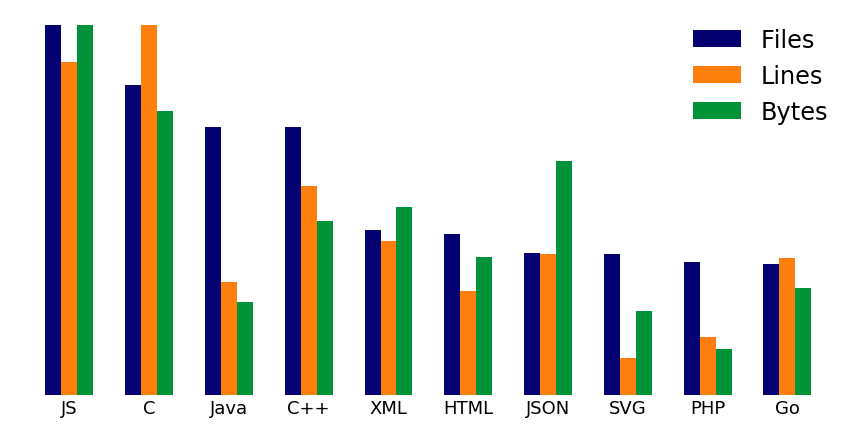

In [50]:
figure(figsize=(12, 6))
ax = subplot(111)

x = arange(1, 11)
ax.bar(x-0.2, values[0], width=0.2, align='center', color="#040273", label="Files")
ax.bar(x, values[1], width=0.2, align='center', color="#ff7f0e", label="Lines")
ax.bar(x+0.2, values[2], width=0.2, align='center', color="#009337", label="Bytes")

ax.set_xticks(x)
langs[0] = "JS"
ax.set_xticklabels(langs, fontsize=18)
ax.tick_params(axis='both', which='both',length=0)
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

legend(fontsize=24).get_frame().set_linewidth(0.0)
tight_layout()
savefig("lang_stats_forks.eps")